# PHYS243: Foundation of Applied Machine Learning

<font size=4>Homework 4 - Handwritten Digits Recognition</font><br>
<font size=3>Prof. Bahram Mobasher, Inst. Abtin Shahidi</font><br>
<font size=3>Submitted By:</font><br>
<font size=3>&nbsp;&nbsp;&nbsp;Ray Felipe</font><br>
<font size=3>&nbsp;&nbsp;&nbsp;Student ID: 862120029</font><br>
<font size=3>&nbsp;&nbsp;&nbsp;Aug. 3, 2019</font>

## Executive Summary

Image recognition is a foundation of machine learning. This exercise demonstrates machine learning algorithm to recognize and classify handwritten images using KNN, Decision Trees, and Random Forest algorithms. The dataset for this exercise is the MNIST dataset, which is a set of 60,000 examples, and a test set of 10,000 examples of handwritten images that can be used for digits writing identification. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image[1]. 

## 1.0 Find all the 9s!

To find all the 9s in the dataset, we must first load the MNIST dataset and view its data and layout to get a better understanding of its structure.

In [129]:
from sklearn import datasets
mnist = datasets.load_digits()

# Print out the description data
print(mnist.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [126]:
print(mnist.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [131]:
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [133]:
mnist.target


array([0, 1, 2, ..., 8, 9, 8])

Let's display some random image. In this case the first data in the array.

In [134]:
digit_image = testData[0] # First digit image
digit_image

array([ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
        0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
       15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
        0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
        0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.])

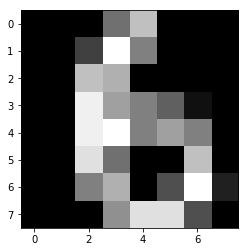

In [135]:
import matplotlib.pyplot as plt

imgdata = np.array(digit_image, dtype='float')
pixels = imgdata.reshape((8, 8))
plt.imshow(pixels, cmap='gray')
plt.show()

We can now display one image. Displaying the rest of the image is not just a matter of changing the <i>testData[x]</i> index above with the x as the array index position in the dataset.

### 1.1 Find the 9s using K-Nearest neighbours for Minkowski metric of order (1, 2, 3).

Now that we have a better view of the data, let's apply the KNN classification algorithm to find the image labels. In this case, all 9s. But first, let's split the data as training and test set[4].

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
                                                                  mnist.target, test_size=0.25, random_state=42)

Using KNN library from SKLearn, we find the predicted labels below.

In [136]:
# Predict the digit
from sklearn.neighbors import KNeighborsClassifier

knn_val = 2
#knn_model = KNeighborsClassifier(n_neighbors=knn_val)
knn_model = KNeighborsClassifier(n_neighbors=knn_val, algorithm='auto', p=1, metric='minkowski')

knn_model.fit(trainData, trainLabels)
knn_predictions = knn_model.predict(testData)
knn_predictions

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 8, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 4, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 3, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 1, 5,
       5, 1, 5, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

To find all the 9s, we simply loop through the <i>predictions</i> array and check for 9s.

In [137]:
nine_image_index_positions = []
for i in range(len(knn_predictions)):
    if knn_predictions[i] == 9:
        nine_image_index_positions.append(i)

print(nine_image_index_positions)

[1, 11, 22, 31, 36, 41, 56, 70, 79, 80, 89, 96, 107, 115, 122, 133, 141, 145, 147, 157, 162, 169, 170, 181, 189, 190, 201, 212, 248, 262, 282, 287, 288, 337, 345, 347, 374, 384, 410, 419, 422, 427, 435, 437]


The output list above is the index position of all digits predicted as 9s. Let's display these results as images below.

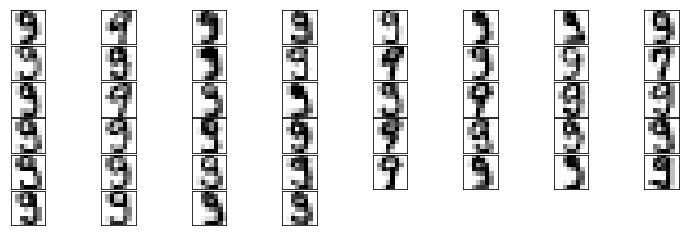

In [139]:
import matplotlib.pyplot as plt

# Figure size (width, height) in inches
fig = plt.figure(figsize=(10, 4))

# Adjust the subplots
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(len(nine_image_index_positions)):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    digit_image = testData[nine_image_index_positions[i]] # Position 1 of the predictions array
    imgdata = np.array(digit_image, dtype='float')
    pixels = imgdata.reshape((8, 8))
    ax.imshow(pixels, cmap=plt.cm.binary, interpolation='nearest')
    #ax.text(0, 7, str(pixels))
    #plt.imshow(pixels, cmap='gray')

plt.show()

### 1.2. Find the 9s using Decision tree.

Next, let's find all the 9s using Decision Tree algorithm. A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements[2].

In [9]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(criterion="gini")
tree_model = tree_model.fit(trainData, trainLabels)
tree_predictions = tree_model.predict(testData)
tree_predictions

array([6, 9, 3, 7, 2, 1, 5, 3, 5, 7, 2, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 9, 5, 6, 8, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 5, 5, 6, 0, 3, 0, 0, 4, 5, 4, 5, 2, 6, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 7, 4, 3, 5, 3, 1, 4, 5, 8, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 4, 7, 5, 9, 7, 5,
       7, 3, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 3, 7, 2, 9, 0, 4, 5, 8, 6, 8, 4, 9, 3, 4, 2, 1, 9,
       7, 7, 2, 2, 3, 9, 6, 0, 3, 8, 2, 5, 6, 9, 9, 4, 1, 5, 4, 3, 3, 6,
       4, 1, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 9, 5,
       2, 7, 4, 6, 4, 5, 6, 4, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 1, 8, 5,
       5, 1, 5, 2, 8, 1, 9, 9, 7, 2, 2, 8, 2, 3, 0, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 3, 3, 6, 0, 4, 1, 0, 2, 3, 6, 5, 9, 7, 7, 7,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 9, 3, 4, 0, 2,

The outcome above are the predicted digits for the training data set using SKlearns Decision Tree Classifier[5]. Now let's find all 9s.

In [10]:
nine_image_index_positions = []
for i in range(len(tree_predictions)):
    if tree_predictions[i] == 9:
        nine_image_index_positions.append(i)

print(nine_image_index_positions)

[1, 11, 22, 26, 31, 36, 41, 70, 79, 80, 89, 96, 115, 122, 129, 141, 144, 145, 147, 157, 162, 170, 175, 181, 189, 190, 201, 205, 212, 218, 248, 249, 262, 282, 287, 288, 296, 335, 337, 345, 347, 368, 374, 384, 410, 415, 419, 422, 427, 435, 437, 444]


The output above tells us the index position of all 9s in the training data set using decision tree prediction. Let's display the predicted images below.

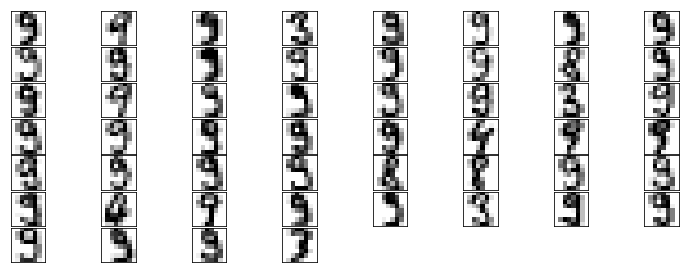

In [11]:
# Figure size (width, height) in inches

fig = plt.figure(figsize=(10, 4))

# Adjust the subplots
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(len(nine_image_index_positions)):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    digit_image = testData[nine_image_index_positions[i]] 
    imgdata = np.array(digit_image, dtype='float')
    pixels = imgdata.reshape((8, 8))
    ax.imshow(pixels, cmap=plt.cm.binary, interpolation='nearest')
    #plt.imshow(pixels, cmap='gray')

plt.show()

The output above are the images predicted by our decision classifier to be 9s. Note that the result is slightly different than the KNN classifier.

### 1.3. Find the 9s using Random Forests.

Next, we find the 9s using random forest algorithm. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees[3].

In [141]:
from sklearn.ensemble import RandomForestClassifier
ran_forest_model = RandomForestClassifier()
ran_forest_model.fit(trainData, trainLabels)
ran_forest_predictions = ran_forest_model.predict(testData)
ran_forest_predictions

C:\Users\ramon\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 4, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 7, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 6, 7, 2, 7, 5, 8, 7, 5,
       7, 1, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 1, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 4, 8, 8, 8, 7, 5, 7, 6, 2, 2, 2, 3, 4, 8, 5, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 4, 3, 5,
       5, 9, 9, 1, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [13]:
nine_image_index_positions = []
for i in range(len(ran_forest_predictions)):
    if ran_forest_predictions[i] == 9:
        nine_image_index_positions.append(i)

print(nine_image_index_positions)

[1, 22, 31, 36, 41, 52, 56, 69, 70, 71, 78, 79, 80, 89, 94, 96, 107, 115, 122, 141, 144, 145, 147, 157, 162, 170, 181, 189, 190, 201, 212, 234, 248, 282, 287, 288, 337, 345, 347, 384, 410, 419, 422, 427, 435, 437]


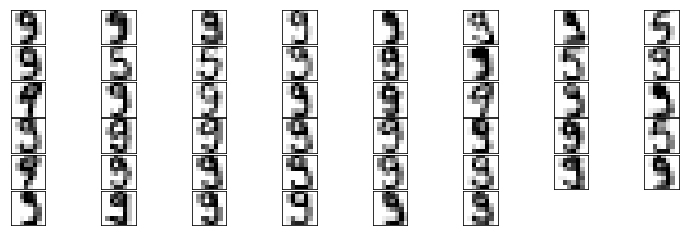

In [14]:
# Figure size (width, height) in inches

fig = plt.figure(figsize=(10, 4))

# Adjust the subplots
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(len(nine_image_index_positions)):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    digit_image = testData[nine_image_index_positions[i]] 
    imgdata = np.array(digit_image, dtype='float')
    pixels = imgdata.reshape((8, 8))
    ax.imshow(pixels, cmap=plt.cm.binary, interpolation='nearest')
    #plt.imshow(pixels, cmap='gray')

plt.show()

The output above shows us the images that are 9s as predicted by our random forest classifier[6].

## 2.0 Find every single digits!

### 2.1. First forget about the labels and run the k-means algorithm to find whether there is an underlying patterns. So, first find the k clusters (there is obviously 10 clusters). Then look at their labels and find the accuracy. By doing this you are turning a supervised learning into an unsupervised learning!

In the first part of this exercise we used classification algorithms to clasify images into number labels. This is called supervised learning given that we know the labels (0-9) in advance. In this second part of the exercise we use clustering, or unsupervised learning, to find labels for the dataset images[8].

#### 2.1.1 Find K Clusters

Using KMeans clustering[7], we can find cluster patterns in our dataset. As before, we have to split our data into training and test set.

In [144]:
from sklearn.preprocessing import scale
data = scale(mnist.data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, mnist.target, mnist.images, test_size=0.25, random_state=42)

from sklearn import cluster
kmeans_clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

kmeans_clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

Now that we have fitted the data into our KMeans model[7], let's view the clusters.

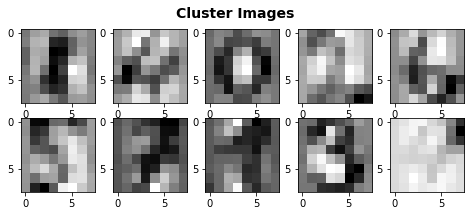

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 3))
fig.suptitle('Cluster Images', fontsize=14, fontweight='bold')

for i in range(10): # For each labels of the cluster - 0 to 9
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(kmeans_clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.show()

#### 2.1.1 Find Labels

Now that we have the clusters from the previous step, let's find the labels for these clusters. In this case, we'll use SVM to predict our labels.

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(mnist.data, mnist.target, mnist.images, test_size=0.25, random_state=42)

from sklearn import svm
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)
'''
kmeans_clf.score(X_test, y_test)  
svm.SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train, y_train).score(X_test, y_test)
'''

"\nkmeans_clf.score(X_test, y_test)  \nsvm.SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train, y_train).score(X_test, y_test)\n"

In [149]:
# Predict the label of `X_test`
print(svc_model.predict(X_test))

# Print `y_test` to check the results
print(y_test)

[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 3 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 7 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 1 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 5 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 9 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 2 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 

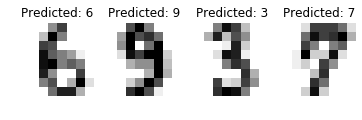

In [150]:
# Import matplotlib
import matplotlib.pyplot as plt

# Assign the predicted values to `predicted`
svc_prediction = svc_model.predict(X_test)

# Zip together the `images_test` and `predicted` values in `images_and_predictions`
images_and_predictions = list(zip(images_test, svc_prediction))

# For the first 4 elements in `images_and_predictions`
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    # Initialize subplots in a grid of 1 by 4 at positions i+1
    plt.subplot(1, 4, index + 1)
    # Don't show axes
    plt.axis('off')
    # Display images in all subplots in the grid
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # Add a title to the plot
    plt.title('Predicted: ' + str(prediction))

# Show the plot
plt.show()

In [151]:
print(images_and_predictions[0][0])
print(images_and_predictions[0][1])

[[ 0.  0.  0.  7. 12.  0.  0.  0.]
 [ 0.  0.  4. 16.  8.  0.  0.  0.]
 [ 0.  0. 12. 11.  0.  0.  0.  0.]
 [ 0.  0. 15. 10.  8.  6.  1.  0.]
 [ 0.  0. 15. 16.  8. 10.  8.  0.]
 [ 0.  0. 14.  7.  0.  0. 12.  0.]
 [ 0.  0.  8. 11.  0.  5. 16.  2.]
 [ 0.  0.  0.  9. 14. 14.  5.  0.]]
6


In [74]:
images_and_predictions[0]

(array([[ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.],
        [ 0.,  0.,  4., 16.,  8.,  0.,  0.,  0.],
        [ 0.,  0., 12., 11.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 15., 10.,  8.,  6.,  1.,  0.],
        [ 0.,  0., 15., 16.,  8., 10.,  8.,  0.],
        [ 0.,  0., 14.,  7.,  0.,  0., 12.,  0.],
        [ 0.,  0.,  8., 11.,  0.,  5., 16.,  2.],
        [ 0.,  0.,  0.,  9., 14., 14.,  5.,  0.]]), 6)

Predicted label of image below:6


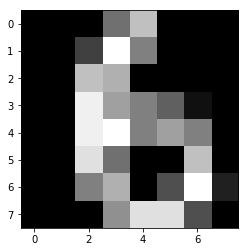

In [91]:
import matplotlib.pyplot as plt

imgdata = np.array(images_and_predictions[0][0], dtype='float')
pixels = imgdata.reshape((8, 8))
plt.imshow(pixels, cmap='gray')
print("Predicted label of image below:" + str(images_and_predictions[0][1]))
plt.show()

Using the same approach above to other digits, we now have the (predicted) labels for all images

#### 2.1.2 Find Accuracy

Let's check the accuracy of this prediction.

In [147]:
kmeans_clf.score(X_test, y_test)  
svm.SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train, y_train).score(X_test, y_test)

0.9911111111111112

The result above tells us that our SVM classification has a very high accuracy, which is 99%.

In addition, let's print the classification report[9] of our test data and the predicted data.

In [37]:
# Import `metrics`
from sklearn import metrics

# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.98      0.93      0.96        46
           4       1.00      0.98      0.99        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       1.00      0.97      0.99        38
           9       0.96      0.96      0.96        48

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  1 43  0  1  0  0  0  1]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0

### 2.2. Find the digits using K-Nearest neighbours for Minkowski metric of order (1, 2, 3).

Leveraging the solution to problem 1.1 above, I used the <i>predictions</i> variable, which contains the predicted labels for all images.

In [101]:
index_positions_for_one = []
index_positions_for_two = []
index_positions_for_three = []
index_positions_for_four = []
index_positions_for_five = []
index_positions_for_six = []
index_positions_for_seven = []
index_positions_for_eight = []
index_positions_for_nine = []
index_positions_for_zero = []
for i in range(len(knn_predictions)):
    if knn_predictions[i] == 1:
        index_positions_for_one.append(i)
    if knn_predictions[i] == 2:
        index_positions_for_two.append(i)
    if knn_predictions[i] == 3:
        index_positions_for_three.append(i)
    if knn_predictions[i] == 4:
        index_positions_for_four.append(i)
    if knn_predictions[i] == 5:
        index_positions_for_five.append(i)
    if knn_predictions[i] == 6:
        index_positions_for_six.append(i)
    if knn_predictions[i] == 7:
        index_positions_for_seven.append(i)
    if knn_predictions[i] == 8:
        index_positions_for_eight.append(i)
    if knn_predictions[i] == 9:
        index_positions_for_nine.append(i)
    if knn_predictions[i] == 0:
        index_positions_for_zero.append(i)

print(index_positions_for_one)


[5, 10, 32, 42, 45, 51, 59, 90, 104, 114, 174, 192, 204, 208, 214, 222, 233, 235, 240, 243, 266, 270, 276, 310, 312, 314, 315, 318, 321, 331, 352, 369, 377, 393, 396, 398, 399, 409, 426, 440]


The output of index_positions_for_one above tells us where the "one" image can be found in our list of images.

Let's try to display a couple of random sample from this output.

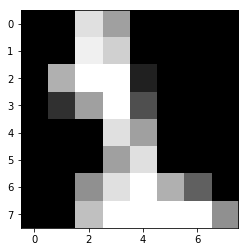

In [102]:
digit_image = testData[5] # Position 141 of the predictections array

imgdata = np.array(digit_image, dtype='float')
pixels = imgdata.reshape((8, 8))
plt.imshow(pixels, cmap='gray')
plt.show()

The image above does, in fact, looks like the number 1. Let's try one more.

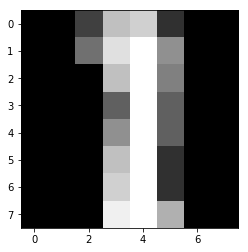

In [103]:
digit_image = testData[10]

imgdata = np.array(digit_image, dtype='float')
pixels = imgdata.reshape((8, 8))
plt.imshow(pixels, cmap='gray')
plt.show()

Now let's try number 7

In [153]:
print(index_positions_for_seven)

[3, 17, 23, 38, 66, 68, 74, 110, 111, 117, 119, 125, 127, 130, 132, 160, 176, 177, 203, 221, 232, 237, 250, 263, 264, 283, 316, 324, 336, 344, 350, 351, 354, 392, 402, 413, 416, 420, 423, 429, 3, 9, 17, 23, 38, 66, 68, 74, 99, 110, 111, 117, 119, 125, 127, 130, 132, 160, 176, 177, 203, 221, 232, 237, 250, 263, 264, 283, 284, 285, 305, 316, 324, 334, 344, 350, 351, 354, 392, 402, 413, 416, 420, 423, 429, 3, 9, 17, 23, 38, 66, 68, 74, 99, 110, 111, 117, 119, 125, 127, 130, 132, 160, 176, 177, 203, 221, 232, 237, 250, 263, 264, 283, 284, 285, 305, 316, 324, 334, 344, 350, 351, 354, 392, 402, 413, 416, 420, 423, 429, 3, 17, 23, 38, 66, 68, 74, 110, 111, 117, 119, 125, 127, 130, 132, 133, 159, 160, 176, 177, 203, 221, 232, 237, 250, 263, 264, 283, 316, 324, 336, 344, 350, 351, 354, 392, 402, 413, 416, 420, 423, 429]


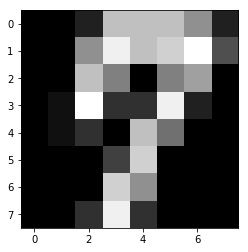

In [154]:
digit_image = testData[3]

imgdata = np.array(digit_image, dtype='float')
pixels = imgdata.reshape((8, 8))
plt.imshow(pixels, cmap='gray')
plt.show()

As expected, the image above looks to be 7.

As we can see, given the solution in the first part of this homework, we now have the classes for all digit image in the dataset.

### 2.3. Find the digits using Decision tree.

Similarly, to find all digits using decision tree, I used the solution to problem 1.2 above.

In [109]:
for i in range(len(tree_predictions)):
    if tree_predictions[i] == 1:
        index_positions_for_one.append(i)
    if tree_predictions[i] == 2:
        index_positions_for_two.append(i)
    if tree_predictions[i] == 3:
        index_positions_for_three.append(i)
    if tree_predictions[i] == 4:
        index_positions_for_four.append(i)
    if tree_predictions[i] == 5:
        index_positions_for_five.append(i)
    if tree_predictions[i] == 6:
        index_positions_for_six.append(i)
    if tree_predictions[i] == 7:
        index_positions_for_seven.append(i)
    if tree_predictions[i] == 8:
        index_positions_for_eight.append(i)
    if tree_predictions[i] == 9:
        index_positions_for_nine.append(i)
    if tree_predictions[i] == 0:
        index_positions_for_zero.append(i)


Let's try 5

In [110]:
print(index_positions_for_five)

[6, 8, 24, 27, 49, 50, 53, 62, 65, 69, 71, 72, 77, 78, 94, 102, 106, 128, 131, 150, 165, 168, 187, 193, 200, 202, 209, 219, 225, 234, 241, 242, 244, 249, 269, 271, 281, 285, 286, 290, 295, 306, 308, 319, 330, 334, 339, 348, 359, 365, 373, 387, 408, 412, 418, 421, 430, 438, 441, 442, 449, 6, 8, 24, 27, 49, 50, 52, 53, 60, 62, 65, 69, 71, 72, 77, 78, 94, 102, 106, 128, 131, 149, 150, 165, 187, 193, 200, 202, 209, 219, 225, 234, 241, 242, 244, 269, 281, 286, 290, 295, 306, 308, 319, 330, 336, 348, 365, 373, 408, 412, 418, 421, 430, 438, 441, 442, 449, 6, 8, 24, 27, 49, 50, 52, 53, 60, 62, 65, 69, 71, 72, 77, 78, 94, 102, 106, 128, 131, 149, 150, 165, 187, 193, 200, 202, 209, 219, 225, 234, 241, 242, 244, 269, 281, 286, 290, 295, 306, 308, 319, 330, 336, 348, 365, 373, 408, 412, 418, 421, 430, 438, 441, 442, 449]


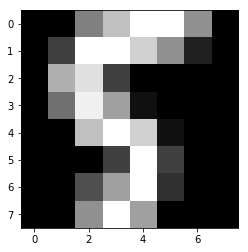

In [111]:
digit_image = testData[6]

imgdata = np.array(digit_image, dtype='float')
pixels = imgdata.reshape((8, 8))
plt.imshow(pixels, cmap='gray')
plt.show()

The image is a 5. This is correct.

### 2.4. Find the digits using Random Forests.

Using the similar approach in the previous steps.

In [113]:
for i in range(len(ran_forest_predictions)):
    if ran_forest_predictions[i] == 1:
        index_positions_for_one.append(i)
    if ran_forest_predictions[i] == 2:
        index_positions_for_two.append(i)
    if ran_forest_predictions[i] == 3:
        index_positions_for_three.append(i)
    if ran_forest_predictions[i] == 4:
        index_positions_for_four.append(i)
    if ran_forest_predictions[i] == 5:
        index_positions_for_five.append(i)
    if ran_forest_predictions[i] == 6:
        index_positions_for_six.append(i)
    if ran_forest_predictions[i] == 7:
        index_positions_for_seven.append(i)
    if ran_forest_predictions[i] == 8:
        index_positions_for_eight.append(i)
    if ran_forest_predictions[i] == 9:
        index_positions_for_nine.append(i)
    if ran_forest_predictions[i] == 0:
        index_positions_for_zero.append(i)

In [156]:
print(index_positions_for_zero)

[13, 47, 55, 57, 58, 60, 67, 75, 81, 85, 97, 124, 134, 140, 148, 153, 163, 183, 217, 227, 261, 265, 267, 274, 277, 278, 294, 299, 307, 317, 325, 340, 343, 361, 362, 364, 366, 367, 388, 407, 417, 428, 439, 13, 47, 55, 57, 58, 67, 75, 81, 85, 124, 134, 140, 148, 153, 163, 183, 217, 256, 261, 265, 267, 274, 277, 294, 299, 307, 317, 325, 340, 343, 361, 362, 364, 366, 367, 388, 407, 417, 428, 439, 13, 47, 55, 57, 58, 67, 75, 81, 85, 124, 134, 140, 148, 153, 163, 183, 217, 256, 261, 265, 267, 274, 277, 294, 299, 307, 317, 325, 340, 343, 361, 362, 364, 366, 367, 388, 407, 417, 428, 439, 13, 47, 55, 57, 58, 60, 67, 75, 81, 85, 124, 134, 140, 148, 153, 163, 183, 217, 227, 261, 265, 267, 274, 277, 278, 294, 299, 307, 317, 325, 340, 343, 361, 362, 364, 366, 367, 388, 407, 417, 428, 439]


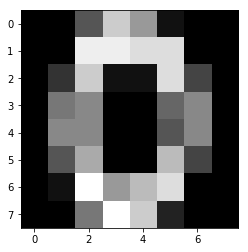

In [115]:
digit_image = testData[13]

imgdata = np.array(digit_image, dtype='float')
pixels = imgdata.reshape((8, 8))
plt.imshow(pixels, cmap='gray')
plt.show()

Voila! The image is a zero.

The same steps can be applied to find "all" the digits in the data set.

### 2.5. Comment on any significant difference between your results for the binary classifier vs. multi-class classifiers.

The difference between binary classification and multi-class classification, in this context, is supervised and unsupervised. In the first part of this homework we used supervised learning classification while the second is unsupervised, given that we had to cluster first to find patterns, then find labels for the given pattern.

In binary classification the output is distinct. In our case the output is a distinct value labels from 0 to 9. In multiclass classification group instances into three or more labels. In part 2 of this exercise we reduced the multi-class classification (culstering) into binary classification by identifying labels of our clusters using SKLearns SVM library.

The signicant results in comparing the binary classification steps in part 1 in comparison to the multi-class classification in part 2 is the accuracy. The accuracy of binary classification once we performed multi-class classification is much higher, 99% accuracy.

# REFERENCES

[1] MNIST Database, http://yann.lecun.com/exdb/mnist/

[2] Decision Tree Algorithm, https://en.wikipedia.org/wiki/Decision_tree

[3] Random Forest Algorithm, https://en.wikipedia.org/wiki/Random_forest

[4] SKLearn KNN Library, https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

[5] SKLearn Decision Tree Library, https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

[6] SKLearn Random Forest Library, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[7] SKLearn KMeans Library, https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

[8] KMeans Clustering Tutorial, https://www.datacamp.com/community/tutorials/k-means-clustering-python

[9] SKLearn Confusion Matrix, https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
